### NMF - Non-Negative Matrix Factorization
```
FileName: NMF-v1.ipynb
Last Updated Date: 11-Jul-2018
Input: Librosa120Sec577FeatsCSVExtract20_v3.gzip
Output: Librosa120Sec577FeatsCSVExtract20_v3_ReducedNMF.gzip
Runtime: 4 mins
Description: Reduce Features, will not know which features are used.  Need absolute values.  
Version:
    v1: 11-Jul-2018: Initial Version
```

In [49]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import NMF
import pandas as pd
import datetime

In [50]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-11 14:12:04


In [51]:
# fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3"# Train
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract10Test_v3" # Test
n_feats = 20

In [52]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

In [53]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [54]:
x_data = df.drop('label',axis=1)
y_labels = df['label'].values

In [55]:
x_data.shape

(101814, 577)

In [56]:
y_labels.shape

(101814,)

In [57]:
y_labels

array([0., 0., 0., ..., 1., 1., 1.])

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,y_labels,test_size=0.00001,random_state=101) # 71351729)

In [59]:
import sklearn
# scaler = sklearn.preprocessing.StandardScaler()
scaler = sklearn.preprocessing.MinMaxScaler()
# scaler = sklearn.preprocessing.MaxAbsScaler()
# scaler = sklearn.preprocessing.QuantileTransformer()
# scaler = sklearn.preprocessing.Normalizer()

In [60]:
X_train = pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test  = pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


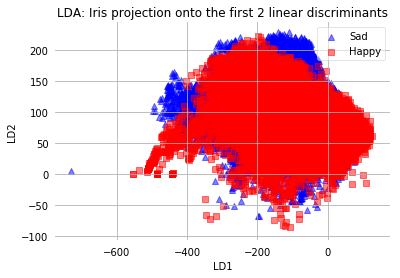

In [61]:
plot_step_lda(x_data.as_matrix(columns=None), y_labels)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


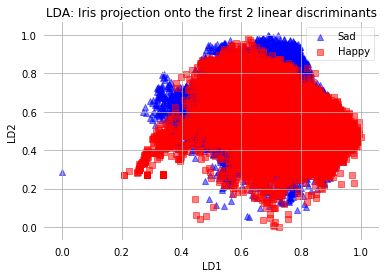

In [62]:
plot_step_lda(X_train.as_matrix(columns=None), y_train)

In [63]:
# Create, fit, and apply NMF
model = NMF(n_components=n_feats) 
W = model.fit_transform(X_train)

In [64]:
H = model.components_

In [65]:
# Unlike PCA, NMF does not give us back top features
headerList = ["ff" + str(i) for i in range(n_feats)]
headerList.append("label")
# headerList

In [66]:
# Add label column to W
newDF = pd.DataFrame(W, columns=None)
newDF["label"] = y_train
newDF.shape

(101812, 21)

In [67]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedNMF" + str(n_feats) + ".gzip"), sep=",", index=False, 
             header=headerList, compression='gzip')

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


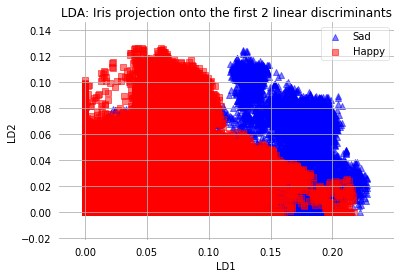

In [68]:
plot_step_lda(W, y_train)

In [69]:
import numpy as np
newX_train = np.dot(W,H)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


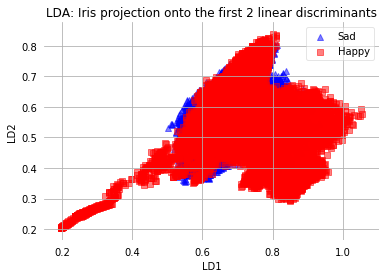

In [70]:
plot_step_lda(newX_train, y_train)

In [71]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-11 14:14:12


In [72]:
y_train

array([0., 0., 1., ..., 1., 1., 0.])